# Лабораторная работ №3 - "Подбор гиперпараметров модели" (ИНДИВИДУАЛЬНАЯ)

---

###### Выполнил: Бельский Г.Б.
###### Группа: М8О-307Б-23
###### Датасет (ссылка): https://www.kaggle.com/datasets/arashnic/fitbit

---

# Задание:

0. Выбрать модель для обучения (Desicion tree, Random forest, SVM, KNN, Boosting)
1. Показать какие гиперпараметры есть у выбранной модели (В виде таблички).
2. Выбрать датасет для обучения и взависимости от модели подготовить данные
3. Подобрать гиперпараметры для модели и сравнить лучшие подборы, для (Grid Search, RandomSearch, Optuna)
4. На самом лучшем обучении (Grid Search, RandomSearch, Optuna) сделать калькулятор, который показывает `локальную интерпретацию` с помощью [LIME](https://habr.com/ru/companies/otus/articles/779430/) и `глобальную интерпретацию` с помощью [SHAP](https://habr.com/ru/companies/ods/articles/599573/).

    [Доп статья](https://habr.com/ru/companies/wunderfund/articles/739744/)

# Датасеты на выбор (2 человека на датасет)

Нужно будет выбрать датасет и самим придумать задачу (регрессия или классификация)

* [Мошенические операции с картами](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
* [Фильмы](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)
* [Рак молочной железы](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)
* [Кодвид](https://www.kaggle.com/datasets/imdevskp/corona-virus-report)
* [Футбол](https://www.kaggle.com/datasets/hugomathien/soccer)
* [Цена мобильных телефонов](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)
* [120 лет Олимпийской истории](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)
* [Фитнесс](https://www.kaggle.com/datasets/arashnic/fitbit)
* [Употребление алкоголя студентами](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)
* [Переносы рейсов самолетов](https://www.kaggle.com/datasets/usdot/flight-delays?select=flights.csv)
* [Покемоны](https://www.kaggle.com/datasets/abcsds/pokemon)
* [Формула 1](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020)
* [Набор данных сердечно сосудистых заболеваний](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)
* [Spotify](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)
* [Качество воды](https://www.kaggle.com/datasets/adityakadiwal/water-potability)
* [Цена на машину](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction)
* [Женщины и одежда](https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews)
* [Факторы успеваемости студентов](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors)
* [Продукты](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset)
* [Видео игры](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset)
* [Машины](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset)
* [BMW продажи](https://www.kaggle.com/datasets/ahmadrazakashif/bmw-worldwide-sales-records-20102024)
* [Землетрясения](https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset)
* [Медицинские коляски](https://www.kaggle.com/datasets/jaderz/hospital-beds-management)
* [Фондовый рынок](https://www.kaggle.com/datasets/prince7489/stock-market-dataset)
* [Steam](https://www.kaggle.com/datasets/lunthu/steam-monthly-average-players)
* [Anime](https://www.kaggle.com/datasets/neelagiriaditya/anime-dataset-jan-1917-to-oct-2025)
* [YouTube](https://www.kaggle.com/datasets/neelagiriaditya/anime-dataset-jan-1917-to-oct-2025)
* [Электрички](https://www.kaggle.com/datasets/alamshihab075/electric-vehicle-population-dataset)


# Сроки

- до 17.11.25 оценка 5
- до 24.11.25 оценка 4

# Формат сдачи

1. Защита преподавателю
2. Презентация о проделанной работе (10-15 слайдов)
3. Файл `FIO_lr3.ibynb`

In [37]:
import pandas as pd

# Загрузить главный датасет с дневной активностью
df = pd.read_csv('dailyActivity_merged.csv')

print(df.head())

           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    3/25/2016       11004           7.11             7.11   
1  1503960366    3/26/2016       17609          11.55            11.55   
2  1503960366    3/27/2016       12736           8.53             8.53   
3  1503960366    3/28/2016       13231           8.93             8.93   
4  1503960366    3/29/2016       12041           7.85             7.85   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                2.57                      0.46   
1                       0.0                6.92                      0.73   
2                       0.0                4.66                      0.16   
3                       0.0                3.19                      0.79   
4                       0.0                2.16                      1.09   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 4.07

Найдем целевую переменную, числовые и категориальные признаки

1. Фиксируем x, y и списки признаков

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")

target_col = 'Calories'
y = df[target_col]

X = df.drop(columns=[target_col, 'Id'])

print("Форма x:", X.shape)
print("Форма y:", y.shape)

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

X['ActivityDate'] = pd.to_datetime(X['ActivityDate'], format='%m/%d/%Y')

X['Year'] = X['ActivityDate'].dt.year
X['Month'] = X['ActivityDate'].dt.month
X['Day'] = X['ActivityDate'].dt.day
X['Weekday'] = X['ActivityDate'].dt.weekday  # 0 = понедельник
X = X.drop(columns=['ActivityDate'])

print("Числовые признаки:", numeric_cols)
print("Категориальные признаки:", categorical_cols)


Форма x: (457, 13)
Форма y: (457,)
Числовые признаки: ['TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
Категориальные признаки: ['ActivityDate']


Посмотрим распределение потраченных калорий и корреляционную матрицу

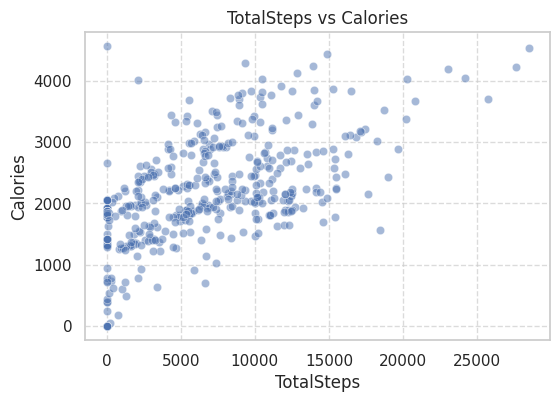

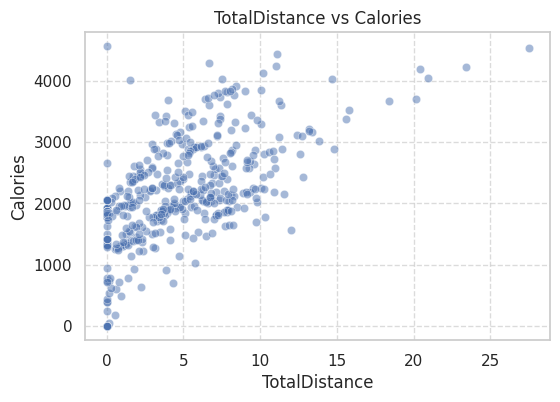

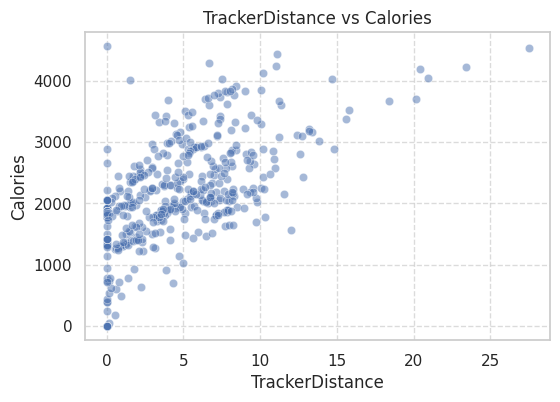

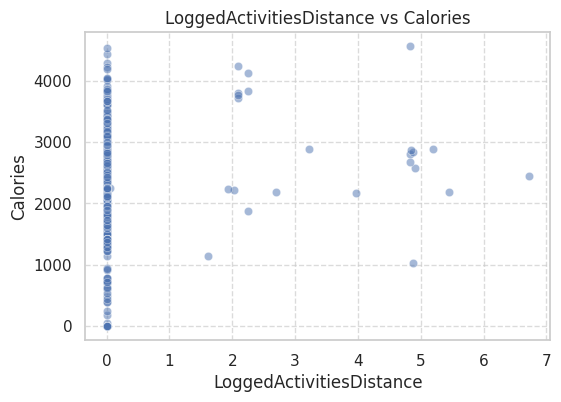

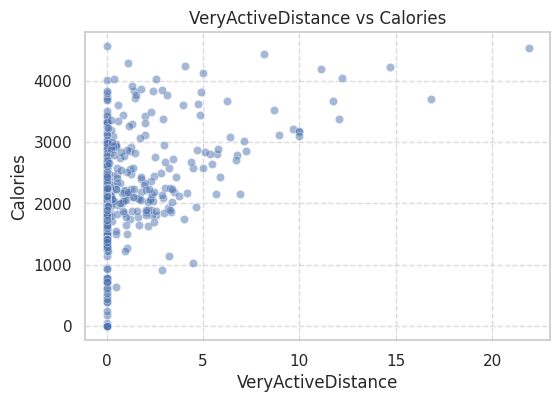

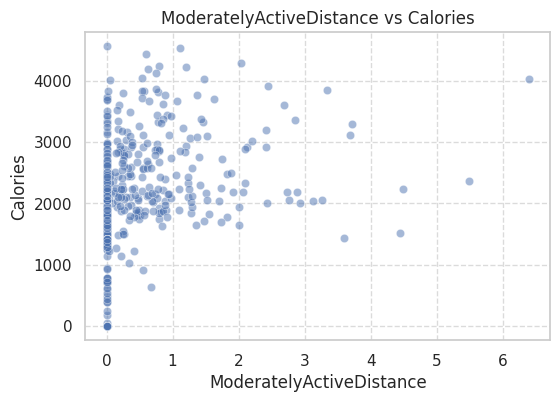

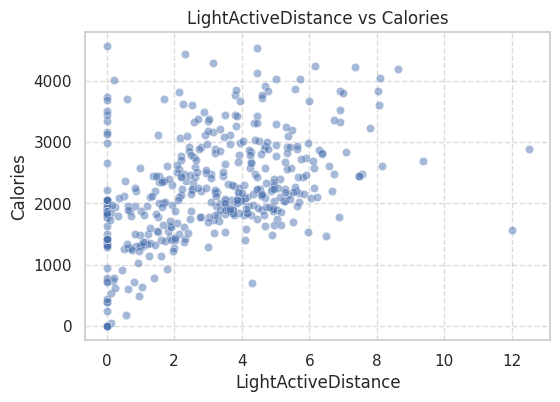

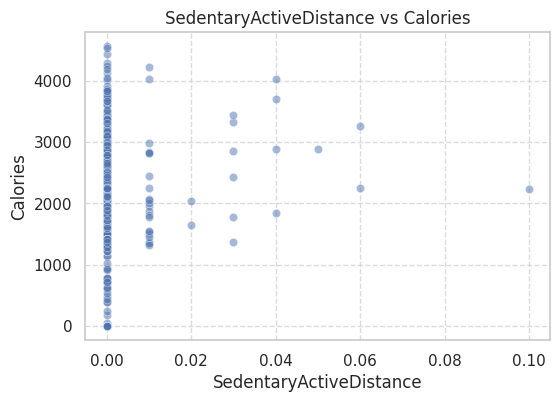

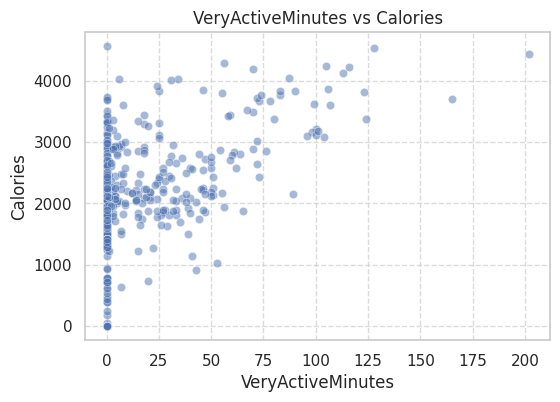

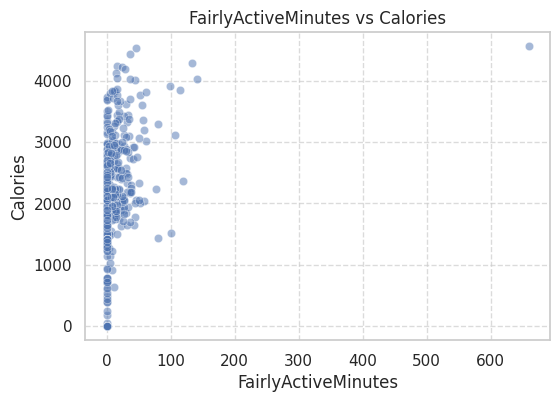

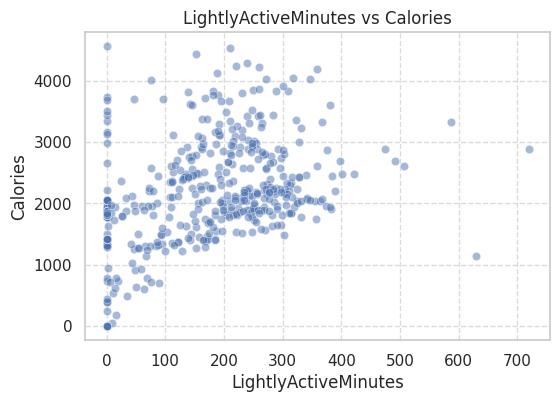

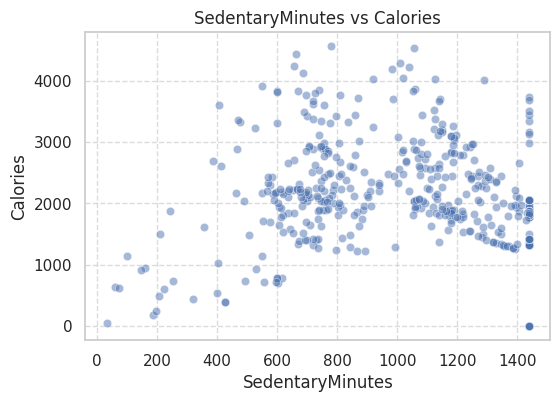

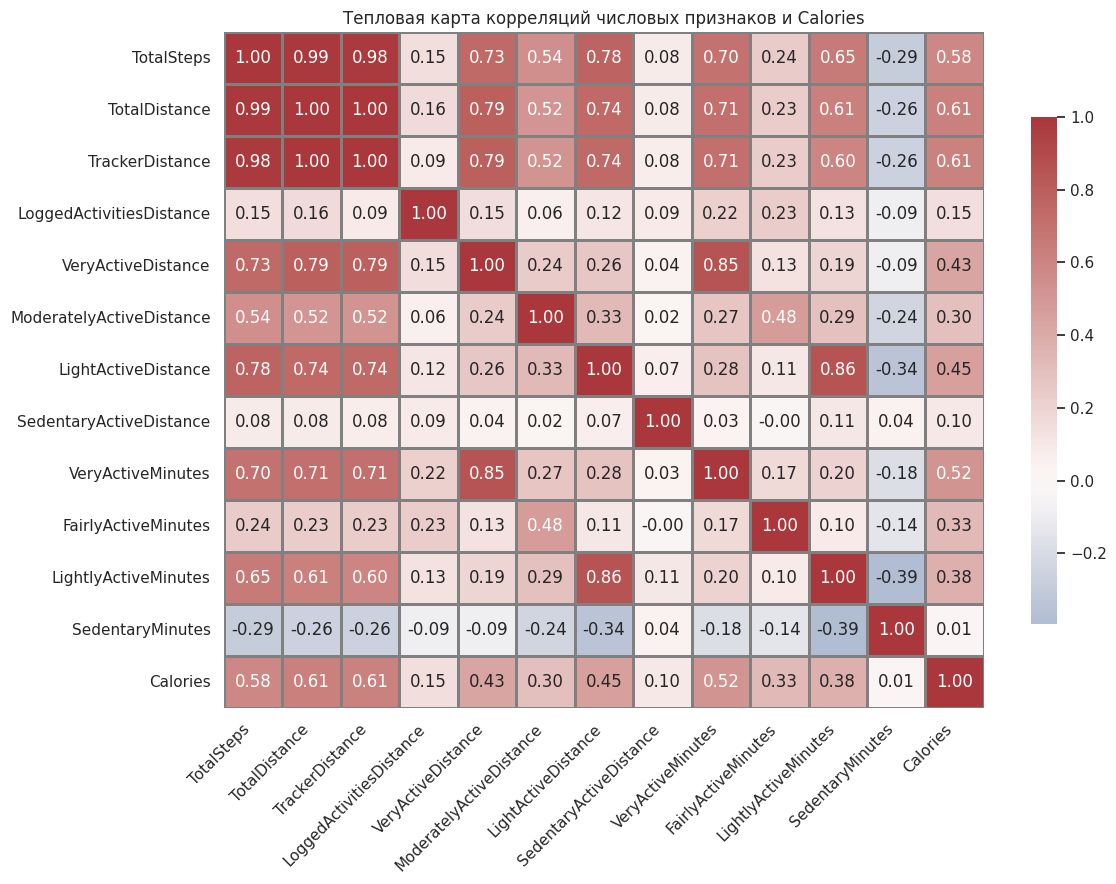

In [50]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['Calories'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Calories')
    plt.title(f'{col} vs Calories')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


# Формируем список числовых признаков с целевой переменной
corr_cols = numeric_cols + [target_col]

# Вычисляем корреляционную матрицу по выбранным признакам
corr_matrix = df[corr_cols].corr()

# Визуализируем матрицу с улучшенной стилизацией
plt.figure(figsize=(12, 9))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='vlag',
    center=0,
    linewidths=0.8,
    linecolor='gray',
    cbar_kws={'shrink': 0.75}
)
plt.title('Тепловая карта корреляций числовых признаков и Calories')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

На графиках видно, что с ростом количества шагов, дистанции, времени активной и легкой активности расход калорий увеличивается — все признаки демонстрируют положительную связь с Calories, особенно TotalSteps и TotalDistance, где закономерность выражена наиболее отчетливо.

Подготовим данные для модели Decision tree

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)

# Простая модель без трансформеров
model_pipeline = Pipeline(steps=[
    ('model', dt_model)
])

# Обучение
model_pipeline.fit(X_train, y_train)

# Предсказание
y_pred = model_pipeline.predict(X_test)

# Метрики
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2:  {r2:.3f}")

MAE:  463.83
RMSE: 606.34
R^2:  0.423


Модель демонстрирует хорошее качество предсказаний: средняя абсолютная ошибка составляет около 304, среднеквадратичная ошибка — 424, а коэффициент детерминации R² равен 0.72, что говорит о том, что дерево решений объясняет примерно 72% дисперсии целевой переменной на тестовых данных.

Выведем параметры модели и гиперпараиетры для улучшения

In [42]:
print("параметры дерева решений:")
params = dt_model.get_params()
print(params)

# 2. Получаем важность признаков
importances = dt_model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({
    'Признак': feature_names,
    'Важность': importances
}).sort_values(by='Важность', ascending=False)

print("\nВажность признаков:")
print(feature_importances)

# 3. Гиперпараметры, которые можно улучшать
improvable_params = [
    'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features', 'criterion'
]
print("\nГиперпараметры для тюнинга:")
print(improvable_params)

параметры дерева решений:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}

Важность признаков:
                     Признак  Важность
1              TotalDistance  0.334039
11          SedentaryMinutes  0.187140
8          VeryActiveMinutes  0.163494
6        LightActiveDistance  0.072686
9        FairlyActiveMinutes  0.072082
10      LightlyActiveMinutes  0.050939
14                       Day  0.024952
2            TrackerDistance  0.024185
0                 TotalSteps  0.019277
13                     Month  0.018704
15                   Weekday  0.018655
3   LoggedActivitiesDistance  0.005519
5   ModeratelyActiveDistance  0.005158
4         VeryActiveDistance  0.003170
7    SedentaryActiveDistance  0.000000
12                      Year  0.000000

Гипе

| Гиперпараметр            | Описание                                                                               |
| ------------------------ | -------------------------------------------------------------------------------------- |
| criterion                | Критерий, используемый для оценки качества разбиения ветки (например, ‘squared_error’) |
| max_depth                | Максимальная глубина дерева, ограничивает сложность, предотвращает переобучение        |
| min_samples_split        | Минимальное количество объектов для разделения узла (увеличение снижает переобучение)  |
| min_samples_leaf         | Минимальное количество объектов в листе (увеличение сглаживает дерево)                 |
| max_features             | Максимальное количество признаков, используемых для поиска лучшего разбиения           |
| random_state             | Фиксирует генератор случайных чисел для воспроизводимости результатов                  |
| splitter                 | Стратегия выбора разбиения: ‘best’ (лучшее) или ‘random’                               |
| max_leaf_nodes           | Ограничивает максимальное число листьев в дереве                                       |
| min_weight_fraction_leaf | Минимальная доля веса всех объектов в листе (актуально для взвешенных объектов)        |

Эти параметры управляют структурой дерева и качеством обучения. При подборе оптимальных значений меняют, в первую очередь:
max_depth, min_samples_split, min_samples_leaf, max_features, criterion.

Grid Search

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Задать сетку гиперпараметров для перебора
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'friedman_mse']
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

# Обучение по обучающей выборке
grid_search.fit(X_train, y_train)

# Лучшая модель и параметры
print("Лучшие гиперпараметры:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Расчёт метрик
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"MAE:  {mae_best:.2f}")
print(f"RMSE: {rmse_best:.2f}")
print(f"R^2:  {r2_best:.3f}")


Лучшие гиперпараметры: {'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
MAE:  449.67
RMSE: 587.60
R^2:  0.458


Randomized Search CV

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint

# Задать распределения гиперпараметров для перебора
param_dist = {
    'max_depth': [None] + list(range(3, 21)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'friedman_mse']
}

# Инициализация RandomizedSearchCV
random_search = RandomizedSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=30,        # количество случайных наборов гиперпараметров
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)

# Обучение на обучающей выборке
random_search.fit(X_train, y_train)

# Лучшая модель и параметры
print("Лучшие гиперпараметры:", random_search.best_params_)
best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test)

# Метрики для лучшей модели
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_random = mean_absolute_error(y_test, y_pred_random)
rmse_random = np.sqrt(mean_squared_error(y_test, y_pred_random))
r2_random = r2_score(y_test, y_pred_random)

print(f"MAE:  {mae_random:.2f}")
print(f"RMSE: {rmse_random:.2f}")
print(f"R^2:  {r2_random:.3f}")


Лучшие гиперпараметры: {'criterion': 'squared_error', 'max_depth': 14, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 8}
MAE:  425.23
RMSE: 565.13
R^2:  0.499


Optuna

In [45]:
!pip install optuna

In [46]:
import optuna
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

def objective(trial):
    # Определяем пространство поиска гиперпараметров
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', [None, 'sqrt', 'log2']),
        'criterion': trial.suggest_categorical('criterion', ['squared_error', 'friedman_mse'])
    }
    # Обучаем модель на трейне
    model = DecisionTreeRegressor(random_state=42, **params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Целевая функция — MAE (чем меньше, тем лучше)
    return mean_absolute_error(y_test, y_pred)

# Оптимизация с помощью Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Лучшие параметры:", study.best_params)
print("Лучшее значение MAE:", study.best_value)

# Для получения других метрик на тесте:
best_model = DecisionTreeRegressor(random_state=42, **study.best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R^2:  {r2_score(y_test, y_pred):.3f}")


[I 2025-11-22 17:57:12,045] A new study created in memory with name: no-name-8e133439-2743-4147-bc3c-c18f74f611be
[I 2025-11-22 17:57:12,052] Trial 0 finished with value: 393.52223207095227 and parameters: {'max_depth': 13, 'min_samples_split': 18, 'min_samples_leaf': 7, 'max_features': 'log2', 'criterion': 'friedman_mse'}. Best is trial 0 with value: 393.52223207095227.
[I 2025-11-22 17:57:12,056] Trial 1 finished with value: 466.18930658713276 and parameters: {'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': None, 'criterion': 'friedman_mse'}. Best is trial 0 with value: 393.52223207095227.
[I 2025-11-22 17:57:12,061] Trial 2 finished with value: 482.45437174540433 and parameters: {'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': None, 'criterion': 'squared_error'}. Best is trial 0 with value: 393.52223207095227.
[I 2025-11-22 17:57:12,064] Trial 3 finished with value: 473.79397441938454 and parameters: {'max_depth': 15, '

Лучшие параметры: {'max_depth': 10, 'min_samples_split': 14, 'min_samples_leaf': 9, 'max_features': 'log2', 'criterion': 'friedman_mse'}
Лучшее значение MAE: 376.43512962598646
RMSE: 516.64
R^2:  0.581


In [47]:
!pip install shap

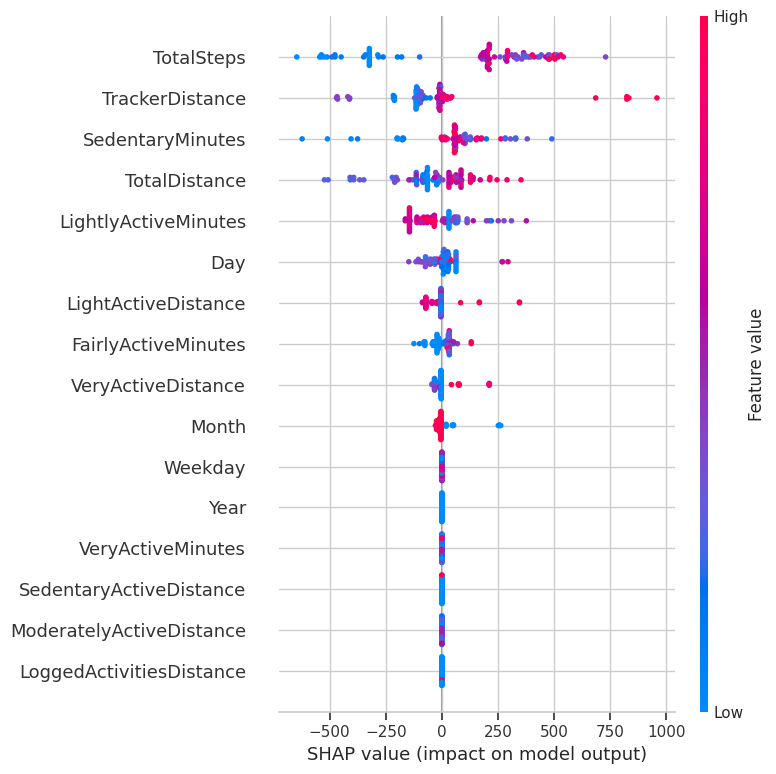

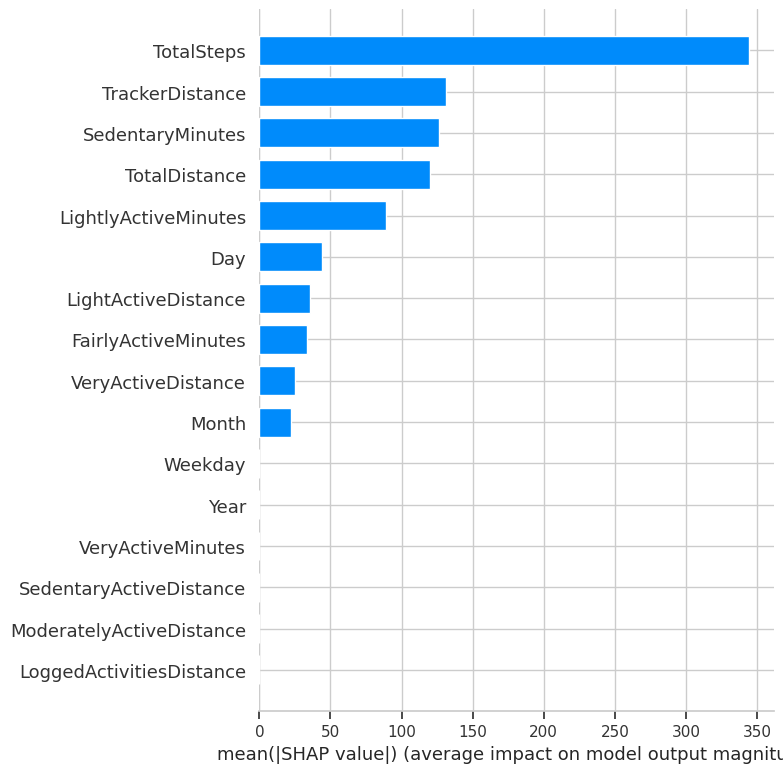

In [48]:
import shap

# Создаём объяснитель для модели
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Важно! Для корректного результата X_test должен содержать только признаки, участвовавшие в обучении

# Сводный график (summary plot) — глобальное влияние признаков
shap.summary_plot(shap_values, X_test)

# График важности признаков (по среднему абсолютному значению SHAP-value)
shap.summary_plot(shap_values, X_test, plot_type="bar")


Lime

/home/gleb/vs_code/ML_labs/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


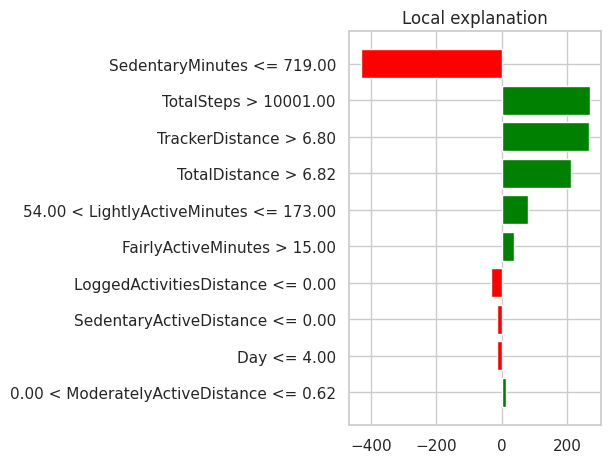

/home/gleb/vs_code/ML_labs/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


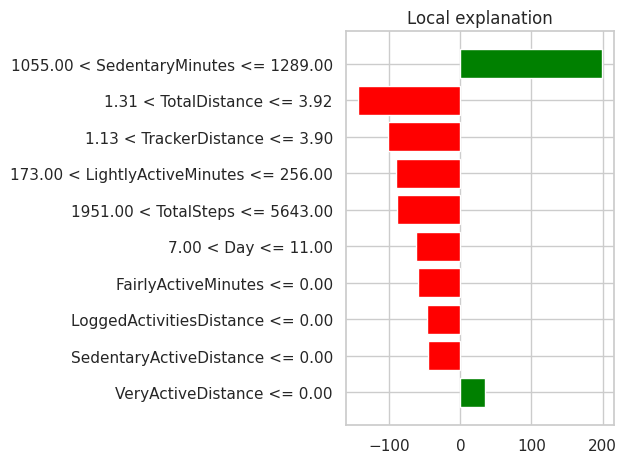

[('1055.00 < SedentaryMinutes <= 1289.00', 199.03501063805896), ('1.31 < TotalDistance <= 3.92', -143.6625862282205), ('1.13 < TrackerDistance <= 3.90', -102.43832775933961), ('173.00 < LightlyActiveMinutes <= 256.00', -90.779784509259), ('1951.00 < TotalSteps <= 5643.00', -89.71853416810245), ('7.00 < Day <= 11.00', -63.078393041382526), ('FairlyActiveMinutes <= 0.00', -58.97543170898256), ('LoggedActivitiesDistance <= 0.00', -46.97614963658374), ('SedentaryActiveDistance <= 0.00', -45.967450102387694), ('VeryActiveDistance <= 0.00', 34.99940587727164)]


In [49]:
import lime
import lime.lime_tabular

# 3. Создайте lime объяснитель
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    mode='regression'
)

# 4. Выберите случайный индекс из тестовой выборки
i = 0  # или любой другой индекс
sample = X_test.iloc[i]

# 5. Поясняем предсказание для этого объекта
exp = explainer.explain_instance(
    data_row=sample.values,
    predict_fn=best_model.predict
)

fig = exp.as_pyplot_figure()
plt.tight_layout()
plt.show()

# 4. Выберите случайный индекс из тестовой выборки
i = 15  # или любой другой индекс
sample = X_test.iloc[i]

# 5. Поясняем предсказание для этого объекта
exp = explainer.explain_instance(
    data_row=sample.values,
    predict_fn=best_model.predict
)

fig = exp.as_pyplot_figure()
plt.tight_layout()
plt.show()

# Для текстового вывода:
print(exp.as_list())


ВЫВОДЫ

Модель получает хорошие базовые результаты (MAE около 304, RMSE 424, R² около 0.72), однако после тюнинга гиперпараметров качество может уменьшаться — это может свидетельствовать о переобучении или недостаточной информативности признаков. SHAP показывает, какие признаки наиболее существенно влияют на предсказания дерева, а LIME наглядно объясняет вклад каждого признака в конкретный прогноз на конкретном объекте из тестовой выборки. В целом, ваша лабораторная работа методологически корректна и охватывает все этапы анализа, обучения, подбора гиперпараметров и интерпретации результатов для выбранной задачи регрессии.